# Comparison of Data Fitting Models

This notebook presents three different viscoelastic models to fit experimental rheological data:

1. **Palierne's Model**

2. **Maxwell Model**

3. **Kelvin-Voigt Model**

Each model will be fitted to experimental data from multiple mayonnaise samples (MayoA1, MayoA2, MayoA3, MayoB, MayoC) with different particle sizes and volume fractions to evaluate their effectiveness in describing the rheological behavior.


In [ ]:
import numpy as np
from scipy.optimize import least_squares
from gplearn.genetic import SymbolicRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from ipywidgets import interact, FloatLogSlider
import warnings
import ipywidgets as widgets
from matplotlib.lines import Line2D
from scipy.optimize import least_squares, differential_evolution
from pysr import PySRRegressor
from scipy.optimize import curve_fit

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


# Experimental data
**For confidentiality reasons, the data will not be published here**

In [ ]:
EXPERIMENTAL_DATA = {
    'MayoA1'
    'MayoA2'
    'MayoA3'
    'MayoB'
    'MayoC' }

# Palierne's model

## Palierne's model with Fixed Parameters

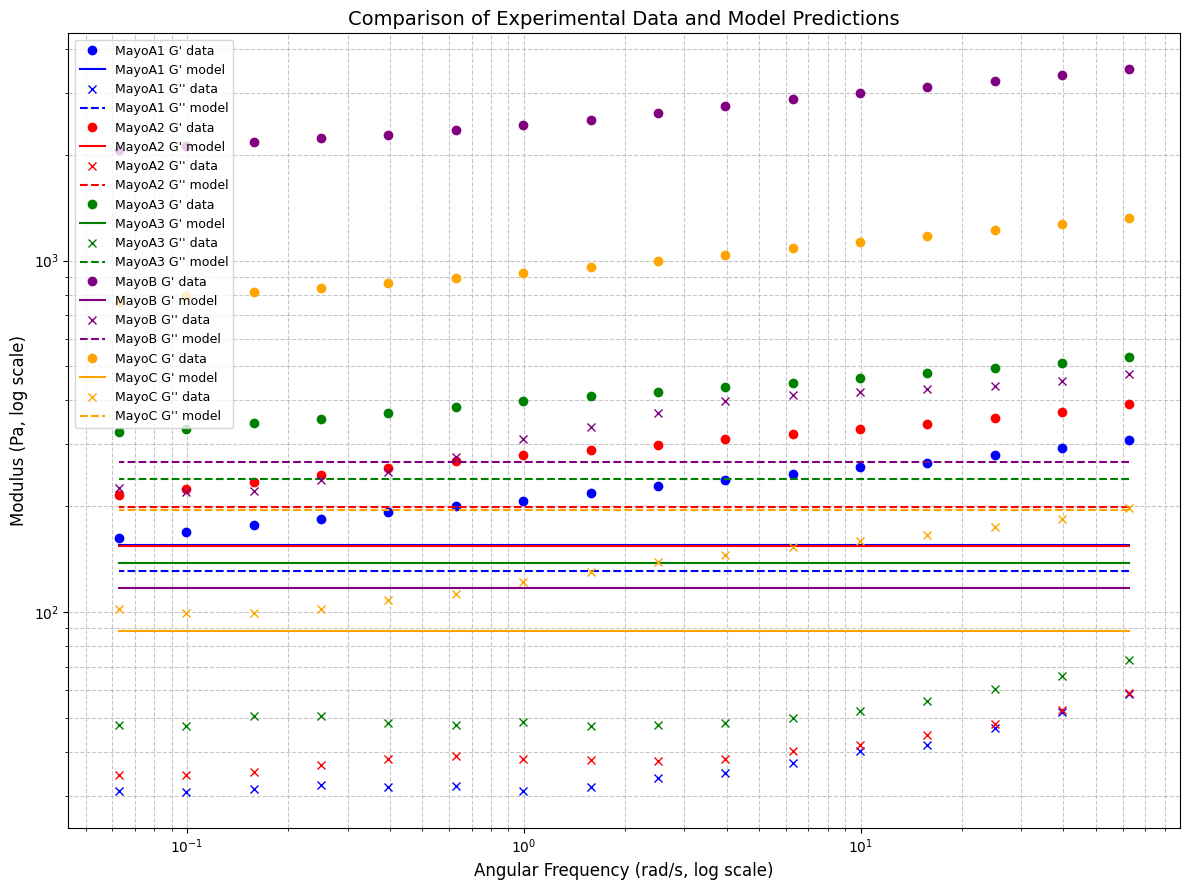

In [3]:
def compute_G_b_star_fixed(omega, G_m_star_const, G_d_star_const, phi, alpha, beta_prime, beta_double_prime, R):
    G_m = np.full_like(omega, G_m_star_const, dtype=complex)
    G_d = np.full_like(omega, G_d_star_const, dtype=complex)

    def E(G_m_arr, G_d_arr):
        term1 = (G_d_arr - G_m_arr) * (19 * G_d_arr + 16 * G_m_arr)
        safe_R = R if R != 0 else 1e-12
        term2 = (4 * alpha / safe_R) * (5 * G_d_arr + 2 * G_m_arr)
        term3 = (beta_prime / safe_R) * (24 * alpha / safe_R + 23 * G_d_arr - 16 * G_m_arr)
        return term1 + term2 + term3

    def D(G_m_arr, G_d_arr):
        term1 = (2 * G_d_arr + 3 * G_m_arr) * (19 * G_d_arr + 16 * G_m_arr)
        safe_R = R if R != 0 else 1e-12 
        term2 = (40 * alpha / safe_R) * (G_d_arr + G_m_arr)
        term3 = (2 * beta_prime / safe_R) * (24 * alpha / safe_R + 23 * G_d_arr + 32 * G_m_arr)
        return term1 + term2 + term3

    E_val = E(G_m, G_d)
    D_val = D(G_m, G_d)
    
    K = E_val / D_val 
    
    numerator = 1 + 3 * phi * K
    denominator = 1 - 2 * phi * K
    
    G_b_star = G_m * (numerator / denominator)
    
    return G_b_star


def combined_plot_fixed():
    alpha = 8e-3  
    beta_prime = 50e-3 
    beta_double_prime = 0

    G_m_star_const = 10 + 1j * 25
    G_d_star_const = 1 + 1j * 1

    datasets_in_order = ['MayoA1', 'MayoA2', 'MayoA3', 'MayoB', 'MayoC']
    colors = ['blue', 'red', 'green', 'purple', 'orange']

    plt.figure(figsize=(12, 9))

    for idx, dataset_name in enumerate(datasets_in_order):
        if dataset_name not in EXPERIMENTAL_DATA:
            print(f"Dataset {dataset_name} not found in EXPERIMENTAL_DATA. Skipping.")
            continue

        data = EXPERIMENTAL_DATA[dataset_name]

        phi = data['phi']
        D_particle = data['D_particle']
        omega = data['omega']
        G_prime_exp = data['G_prime_exp']
        G_double_prime_exp = data['G_double_prime_exp']
        
        R = D_particle / 2

        G_b_star = compute_G_b_star_fixed(
            omega, 
            G_m_star_const, 
            G_d_star_const, 
            phi, 
            alpha, 
            beta_prime, 
            beta_double_prime, 
            R
        )

        plt.loglog(omega, G_prime_exp, marker='o', linestyle='none', color=colors[idx],
                   label=f'{dataset_name} G\' data')
        plt.loglog(omega, G_b_star.real, linestyle='-', color=colors[idx],
                   label=f'{dataset_name} G\' model')

        plt.loglog(omega, G_double_prime_exp, marker='x', linestyle='none', color=colors[idx],
                   label=f'{dataset_name} G\'\' data')
        plt.loglog(omega, G_b_star.imag, linestyle='--', color=colors[idx],
                   label=f'{dataset_name} G\'\' model')

    plt.xlabel('Angular Frequency (rad/s, log scale)', fontsize=12)
    plt.ylabel('Modulus (Pa, log scale)', fontsize=12)
    plt.title("Comparison of Experimental Data and Model Predictions", fontsize=14)
    plt.grid(True, which="both", ls="--", alpha=0.7)
    
    plt.legend(fontsize=9, loc='best')
    
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    combined_plot_fixed()


<>:117: SyntaxWarning: invalid escape sequence '\c'
<>:118: SyntaxWarning: invalid escape sequence '\c'
<>:117: SyntaxWarning: invalid escape sequence '\c'
<>:118: SyntaxWarning: invalid escape sequence '\c'
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_3588/3035314821.py:117: SyntaxWarning: invalid escape sequence '\c'
  print(f"  Fitted eta_m:  {eta_m_opt:.6g} Pa$\cdot$s")
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_3588/3035314821.py:118: SyntaxWarning: invalid escape sequence '\c'
  print(f"  Fitted eta_d:  {eta_d_opt:.6g} Pa$\cdot$s")



Palierne Model for MayoA1:
  Fitted eta_m:  788.603 Pa$\cdot$s
  Fitted eta_d:  167.412 Pa$\cdot$s
  Fitted lam_m:  33.3066 s
  Fitted lam_d:  0.001 s
  MSE total: 1.5047e+03  (Real: 7.0967e+02, Imag: 7.9508e+02)
  Optimization success: True (message: `ftol` termination condition is satisfied.)
----------------------------------------------------------------

Palierne Model for MayoA2:
  Fitted eta_m:  1208.47 Pa$\cdot$s
  Fitted eta_d:  419.754 Pa$\cdot$s
  Fitted lam_m:  41.3095 s
  Fitted lam_d:  0.001 s
  MSE total: 2.4101e+03  (Real: 1.3182e+03, Imag: 1.0920e+03)
  Optimization success: True (message: `ftol` termination condition is satisfied.)
----------------------------------------------------------------

Palierne Model for MayoA3:
  Fitted eta_m:  1978.16 Pa$\cdot$s
  Fitted eta_d:  918.573 Pa$\cdot$s
  Fitted lam_m:  49.1859 s
  Fitted lam_d:  0.001 s
  MSE total: 4.1337e+03  (Real: 2.3066e+03, Imag: 1.8271e+03)
  Optimization success: True (message: `ftol` termination cond

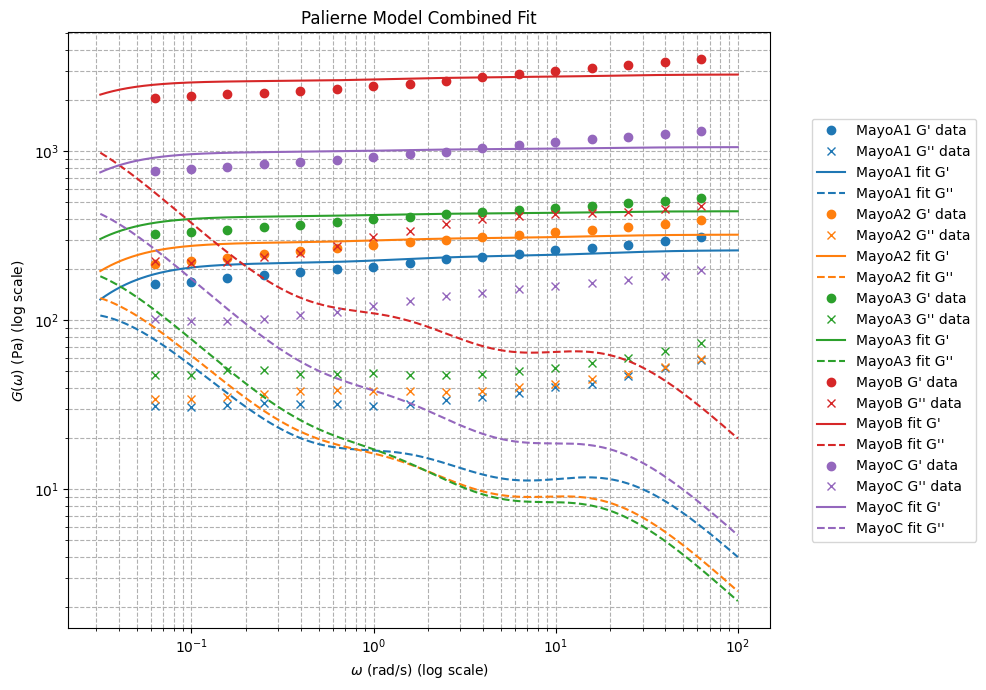

In [4]:
def G_m_star(omega, eta_m, lambda_m):
    return (1j * omega * eta_m) / (1.0 + 1j * omega * lambda_m)

def G_d_star(omega, eta_d, lambda_d):
    return (1j * omega * eta_d) / (1.0 + 1j * omega * lambda_d)

def E_palierne(omega, G_m, G_d, R):
    term1 = (G_d - G_m) * (19.0 * G_d + 16.0 * G_m)
    term2 = (4.0 * ALPHA / R) * (5.0 * G_d + 2.0 * G_m)
    term3 = (2.0 * BETA_DOUBLE_PRIME / R) * ((8.0 * ALPHA / R) + 13.0 * G_d + 8.0 * G_m)
    return term1 + term2 + term3

def D_palierne(omega, G_m, G_d, R):
    term1 = (2.0 * G_d + 3.0 * G_m) * (19.0 * G_d + 16.0 * G_m)
    term2 = (40.0 * ALPHA / R) * (G_d + G_m)
    term3 = (4.0 * BETA_DOUBLE_PRIME / R) * ((8.0 * ALPHA / R) + 13.0 * G_d + 12.0 * G_m)
    return term1 + term2 + term3


def palierne_model_complex(omega, eta_m, lambda_m, eta_d, lambda_d, phi, R):
    Gm = G_m_star(omega, eta_m, lambda_m)
    Gd = G_d_star(omega, eta_d, lambda_d)
    E_val = E_palierne(omega, Gm, Gd, R)
    D_val = D_palierne(omega, Gm, Gd, R)
    K_val = E_val / D_val
    numerator = 1.0 + 3.0 * phi * K_val
    denominator = 1.0 - 2.0 * phi * K_val
    return Gm * (numerator / denominator)

def palierne_residual(params, omega, Gp_exp, Gpp_exp, phi, R):
    eta_m, eta_d, lam_m, lam_d = params

    # Model's complex modulus
    G_model_complex = palierne_model_complex(omega, eta_m, lam_m, eta_d, lam_d, phi, R)

    Gp_model = G_model_complex.real
    Gpp_model = G_model_complex.imag

    res_gprime  = Gp_model - Gp_exp
    res_gdouble = Gpp_model - Gpp_exp
    # return res_gdouble
    return np.concatenate([res_gprime, res_gdouble])

def fit_palierne_combined(
    omega, Gp_exp, Gpp_exp, phi, R,
    eta_m_bounds=(1e-3, 1e6),
    eta_d_bounds=(1e-3, 1e6),
    lam_m_bounds=(1e-3, 1e6),
    lam_d_bounds=(1e-3, 1e6),
    initial_params=(1e3, 1e3, 1e3, 1e3)
):

    lower_bounds = [eta_m_bounds[0], eta_d_bounds[0], lam_m_bounds[0], lam_d_bounds[0]]
    upper_bounds = [eta_m_bounds[1], eta_d_bounds[1], lam_m_bounds[1], lam_d_bounds[1]]
    bounds = (lower_bounds, upper_bounds)

    result = least_squares(
        fun=palierne_residual,
        x0=initial_params,
        args=(omega, Gp_exp, Gpp_exp, phi, R),
        bounds=bounds,
        method='trf',
        # verbose=2
    )

    return (*result.x, result)


def compute_mse_complex(omega, Gp_exp, Gpp_exp, eta_m_opt, lam_m_opt, eta_d_opt, lam_d_opt, phi, R):
    G_exp_complex = Gp_exp + 1j * Gpp_exp
    G_model_complex = palierne_model_complex(omega, eta_m_opt, lam_m_opt, eta_d_opt, lam_d_opt, phi, R)

    diff = G_model_complex - G_exp_complex
    mse_total = np.mean(np.abs(diff)**2)
    mse_real  = np.mean((G_model_complex.real - Gp_exp)**2)
    mse_imag  = np.mean((G_model_complex.imag - Gpp_exp)**2)

    return mse_total, mse_real, mse_imag

def analyze_dataset_palierne_combined(dataset_name):

    if dataset_name not in EXPERIMENTAL_DATA:
        print(f"Dataset {dataset_name} not found in EXPERIMENTAL_DATA.")
        return None

    data = EXPERIMENTAL_DATA[dataset_name]
    omega  = data['omega']
    Gp_exp = data['G_prime_exp']
    Gpp_exp = data['G_double_prime_exp']
    D_particle = data['D_particle']  # diameter
    phi = data['phi']
    
    R = D_particle / 2.0

    # Example fixed bounds & initial params:
    eta_m_bounds=(1e-3, 1e6)
    eta_d_bounds=(1e-3, 1e6)
    lam_m_bounds=(1e-3, 1e6)
    lam_d_bounds=(1e-3, 1e6)   #??????????better lower bound should be found
    initial_params=(1e1, 1e1, 1e1, 1e1)  # [eta_m, eta_d, lambda_m, lambda_d]

    # Fit
    eta_m_opt, eta_d_opt, lam_m_opt, lam_d_opt, result = fit_palierne_combined(
        omega, Gp_exp, Gpp_exp, phi, R,
        eta_m_bounds, eta_d_bounds, lam_m_bounds, lam_d_bounds,
        initial_params
    )

    # Compute MSE
    mse_total, mse_real, mse_imag = compute_mse_complex(
        omega, Gp_exp, Gpp_exp,
        eta_m_opt, lam_m_opt, eta_d_opt, lam_d_opt,
        phi, R
    )

    print(f"\nPalierne Model for {dataset_name}:")
    print(f"  Fitted eta_m:  {eta_m_opt:.6g} Pa$\cdot$s")
    print(f"  Fitted eta_d:  {eta_d_opt:.6g} Pa$\cdot$s")
    print(f"  Fitted lam_m:  {lam_m_opt:.6g} s")
    print(f"  Fitted lam_d:  {lam_d_opt:.6g} s")
    print(f"  MSE total: {mse_total:.4e}  (Real: {mse_real:.4e}, Imag: {mse_imag:.4e})")
    print(f"  Optimization success: {result.success} (message: {result.message})")
    print("----------------------------------------------------------------")

    return {
        'eta_m': eta_m_opt,
        'eta_d': eta_d_opt,
        'lambda_m': lam_m_opt,
        'lambda_d': lam_d_opt,
        'mse_total': mse_total,
        'mse_real': mse_real,
        'mse_imag': mse_imag,
        'result': result
    }


def plot_all_data_palierne_fits_combined(dataset_names):
    plt.figure(figsize=(10, 7))
    omega_line = np.logspace(-1.5, 2, 500)   # for smooth curve
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for idx, name in enumerate(dataset_names):
        if name not in EXPERIMENTAL_DATA:
            print(f"Dataset {name} not found, skipping...")
            continue

        fit_result = analyze_dataset_palierne_combined(name)
        if fit_result is None:
            continue

        eta_m_opt  = fit_result['eta_m']
        eta_d_opt  = fit_result['eta_d']
        lam_m_opt  = fit_result['lambda_m']
        lam_d_opt  = fit_result['lambda_d']

        # Experimental data
        data = EXPERIMENTAL_DATA[name]
        omega_exp = data['omega']
        Gp_exp    = data['G_prime_exp']
        Gpp_exp   = data['G_double_prime_exp']
        R = data['D_particle'] / 2.0
        phi = data['phi']

        # Compute model on a separate omega_line for plotting
        G_model_line = palierne_model_complex(
            omega_line,
            eta_m_opt, lam_m_opt,
            eta_d_opt, lam_d_opt,
            phi, R
        )
        Gp_model_line  = G_model_line.real
        Gpp_model_line = G_model_line.imag

        # Plot experimental data
        c = color_cycle[idx % len(color_cycle)]
        plt.loglog(omega_exp, Gp_exp,  'o', color=c, label=f"{name} G' data")
        plt.loglog(omega_exp, Gpp_exp, 'x', color=c, label=f"{name} G'' data")

        # Plot fitted lines
        plt.loglog(omega_line, Gp_model_line,  color=c, linestyle='-', label=f"{name} fit G'")
        plt.loglog(omega_line, Gpp_model_line, color=c, linestyle='--', label=f"{name} fit G''")

    plt.xlabel(r'$\omega$ (rad/s) (log scale)')
    plt.ylabel(r'$G(\omega)$ (Pa) (log scale)')
    plt.title("Palierne Model Combined Fit")
    plt.grid(True, which='both', ls='--')
    # Put legend to the side if too crowded
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
    plt.tight_layout()
    plt.show()

def main():
    dataset_names = ['MayoA1', 'MayoA2', 'MayoA3', 'MayoB', 'MayoC']
    plot_all_data_palierne_fits_combined(dataset_names)

if __name__ == "__main__":
    main()


# Maxwell Model

## Maxwell Model Definition
The Maxwell model for the complex modulus $G^*(\omega)$ is expressed as:
$$
G^*(\omega) = \frac{i \omega \eta}{1 + i \omega \lambda},
$$
where:
- $\eta$: Viscosity parameter.
- $\lambda$: Relaxation time.
- $G'(\omega) = \frac{\omega^2 \eta \lambda}{1 + (\omega \lambda)^2},$
- $G''(\omega) = \frac{\omega \eta}{1 + (\omega \lambda)^2}.$
## Interactive Visualization of Maxwell Model Modulus

Demonstrates how to interactively explore the storage (`G'`) and loss (`G''`) moduli of a blended Maxwell model as a function of frequency. By adjusting the parameters $\eta_b$ and $\lambda_b$ through interactive sliders, you can observe how changes in these parameters affect the shape and magnitude of the moduli curves.


In [2]:
omega_min = 1e-2
omega_max = 1e2
num_points = 500
omega = np.logspace(np.log10(omega_min), np.log10(omega_max), num_points)

def maxwell_moduli(eta_b, lambda_b):
    Gp = (omega**2 * lambda_b * eta_b) / (1 + (omega * lambda_b)**2)
    Gpp = (omega * eta_b) / (1 + (omega * lambda_b)**2)

    plt.figure(figsize=(8,6))
    plt.loglog(omega, Gp, color='red', label="$G'(\omega)$ (storage modulus)")
    plt.loglog(omega, Gpp, color='blue',label="$G''(\omega)$ (loss modulus)")
    plt.xlabel(r'$\omega$ (rad/s) (log scale)')
    plt.ylabel('Modulus (Pa)')
    plt.title('Maxwell Model: Storage & Loss Moduli')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.7)
    plt.show()

# eta_b: 1e-6 - 1e10 (logscale)
# lambda_b: 1e2 - 1e10 (logscale)
eta_b_slider = FloatLogSlider(value=1e3, base=10, min=-6, max=10, step=0.1, description='eta_b', continuous_update=False)
lambda_b_slider = FloatLogSlider(value=1e6, base=10, min=-30, max=10, step=0.1, description='lambda_b', continuous_update=False)

interact(maxwell_moduli, eta_b=eta_b_slider, lambda_b=lambda_b_slider);


<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escape sequence '\o'
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_4897/3895077501.py:11: SyntaxWarning: invalid escape sequence '\o'
  plt.loglog(omega, Gp, color='red', label="$G'(\omega)$ (storage modulus)")
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_4897/3895077501.py:12: SyntaxWarning: invalid escape sequence '\o'
  plt.loglog(omega, Gpp, color='blue',label="$G''(\omega)$ (loss modulus)")


interactive(children=(FloatLogSlider(value=1000.0, continuous_update=False, description='eta_b', max=10.0, min…

## Maxwell Model - Data Fitting


Maxwell Model for MayoA1:
  Fitted eta:    7678.15
  Fitted lambda: 33.2931
  MSE total: 2.8646e+03  (Real: 1.5179e+03, Imag: 1.3468e+03)
  Optimization success: True (message: `ftol` termination condition is satisfied.)
----------------------------------------------------------------

Maxwell Model for MayoA2:
  Fitted eta:    12152
  Fitted lambda: 40.5701
  MSE total: 3.7286e+03  (Real: 2.1446e+03, Imag: 1.5840e+03)
  Optimization success: True (message: `ftol` termination condition is satisfied.)
----------------------------------------------------------------

Maxwell Model for MayoA3:
  Fitted eta:    20535.5
  Fitted lambda: 48.6247
  MSE total: 5.6952e+03  (Real: 3.3141e+03, Imag: 2.3810e+03)
  Optimization success: True (message: `ftol` termination condition is satisfied.)
----------------------------------------------------------------

Maxwell Model for MayoB:
  Fitted eta:    169440
  Fitted lambda: 63.2502
  MSE total: 3.0712e+05  (Real: 1.9030e+05, Imag: 1.1683e+05)
  Op

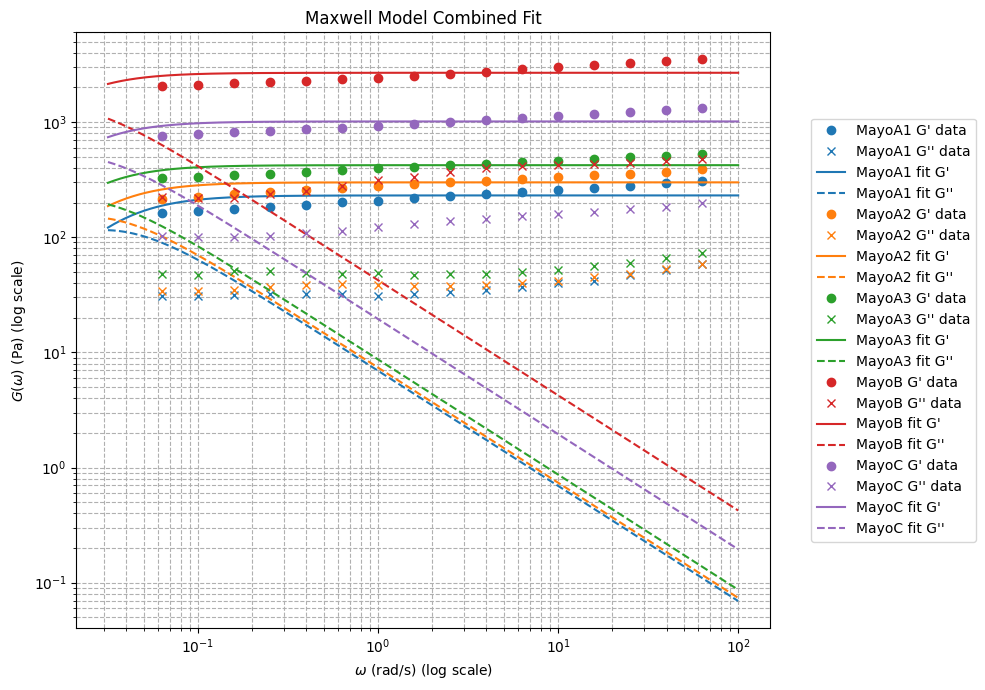

In [6]:
def maxwell_model_gprime(omega, eta, lam):
    return (eta * (omega**2) * lam) / (1.0 + (omega * lam)**2)

def maxwell_model_gdoubleprime(omega, eta, lam):
    return (eta * omega) / (1.0 + (omega * lam)**2)

def maxwell_residual(params, omega, Gp_exp, Gpp_exp):
    eta, lam = params
    
    Gp_model = maxwell_model_gprime(omega, eta, lam)       # array of length N
    Gpp_model = maxwell_model_gdoubleprime(omega, eta, lam)  # array of length N

    res_gprime = Gp_model - Gp_exp
    res_gdouble = Gpp_model - Gpp_exp
    return np.concatenate([res_gprime, res_gdouble])

def estimate_eta_range(omega, G_double_prime_exp):
    eta_candidates = G_double_prime_exp / omega
    eta_min = np.min(eta_candidates)
    eta_max = np.max(eta_candidates)
    return eta_min, eta_max

def fit_maxwell_combined(
    omega, Gp_exp, Gpp_exp, 
    eta_bounds=(0.01, 1000),  lam_bounds=(0.01, 1000)):
    bounds = (
        [eta_bounds[0], lam_bounds[0]],  # lower bounds
        [eta_bounds[1], lam_bounds[1]]   # upper bounds
    )

    eta_init = np.sqrt(eta_bounds[0] * eta_bounds[1])
    lam_init = np.sqrt(lam_bounds[0] * lam_bounds[1])
    initial_guess = [eta_init, lam_init]

    result = least_squares(
        fun=maxwell_residual,
        x0=initial_guess,
        args=(omega, Gp_exp, Gpp_exp),
        bounds=bounds,
        # verbose=2
    )

    eta_opt, lam_opt = result.x
    return eta_opt, lam_opt, result

def compute_mse_complex(omega, Gp_exp, Gpp_exp, eta_opt, lam_opt):

    G_exp_complex = Gp_exp + 1j * Gpp_exp
    Gp_model  = maxwell_model_gprime(omega, eta_opt, lam_opt)
    Gpp_model = maxwell_model_gdoubleprime(omega, eta_opt, lam_opt)
    G_model_complex = Gp_model + 1j * Gpp_model

    # Compute differences
    diff = G_model_complex - G_exp_complex
    mse_total = np.mean(np.abs(diff)**2)
    mse_real  = np.mean((Gp_model  - Gp_exp)**2)
    mse_imag  = np.mean((Gpp_model - Gpp_exp)**2)

    return mse_total, mse_real, mse_imag

def analyze_dataset_maxwell_combined(dataset_name):
    if dataset_name not in EXPERIMENTAL_DATA:
        print(f"Dataset {dataset_name} not found.")
        return None

    data = EXPERIMENTAL_DATA[dataset_name]
    omega  = data['omega']
    Gp_exp = data['G_prime_exp']
    Gpp_exp = data['G_double_prime_exp']

    # Fit the Maxwell model with fixed parameter bounds
    eta_opt, lam_opt, result = fit_maxwell_combined(
        omega, Gp_exp, Gpp_exp,
        eta_bounds=(0.01, 10000000), # upper bound is 10^7
        lam_bounds=(0.01, 1000),
    )

    mse_total, mse_real, mse_imag = compute_mse_complex(omega, Gp_exp, Gpp_exp, eta_opt, lam_opt)

    print(f"\nMaxwell Model for {dataset_name}:")
    print(f"  Fitted eta:    {eta_opt:.6g}")
    print(f"  Fitted lambda: {lam_opt:.6g}")
    print(f"  MSE total: {mse_total:.4e}  (Real: {mse_real:.4e}, Imag: {mse_imag:.4e})")
    print(f"  Optimization success: {result.success} (message: {result.message})")
    print("----------------------------------------------------------------")

    return {
        'eta': eta_opt,
        'lambda': lam_opt,
        'mse_total': mse_total,
        'mse_real': mse_real,
        'mse_imag': mse_imag,
        'result': result
    }


def plot_all_data_maxwell_fits_combined(dataset_names):
    plt.figure(figsize=(10, 7))
    omega_line = np.logspace(-1.5, 2, 500)   # for smooth curve plotting
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for idx, name in enumerate(dataset_names):
        if name not in EXPERIMENTAL_DATA:
            continue

        fit_result = analyze_dataset_maxwell_combined(name)
        if fit_result is None:
            continue

        eta_opt = fit_result['eta']
        lam_opt = fit_result['lambda']

        # Experimental data
        data = EXPERIMENTAL_DATA[name]
        omega_exp = data['omega']
        Gp_exp    = data['G_prime_exp']
        Gpp_exp   = data['G_double_prime_exp']

        # Maxwell model predictions for plotting
        Gp_model_line  = maxwell_model_gprime(omega_line, eta_opt, lam_opt)
        Gpp_model_line = maxwell_model_gdoubleprime(omega_line, eta_opt, lam_opt)

        c = color_cycle[idx % len(color_cycle)]

        # Plot experimental data
        plt.loglog(omega_exp, Gp_exp, 'o', color=c, label=f"{name} G' data")
        plt.loglog(omega_exp, Gpp_exp, 'x', color=c, label=f"{name} G'' data")

        # Plot fitted lines
        plt.loglog(omega_line, Gp_model_line,  color=c, linestyle='-',  label=f"{name} fit G'")
        plt.loglog(omega_line, Gpp_model_line, color=c, linestyle='--', label=f"{name} fit G''")

    plt.xlabel(r'$\omega$ (rad/s) (log scale)')
    plt.ylabel(r'$G(\omega)$ (Pa) (log scale)')
    plt.title("Maxwell Model Combined Fit")
    plt.grid(True, which='both', ls='--')
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
    plt.tight_layout()
    plt.show()


def main():
    dataset_names = ['MayoA1', 'MayoA2', 'MayoA3', 'MayoB', 'MayoC']
    plot_all_data_maxwell_fits_combined(dataset_names)

if __name__ == "__main__":
    main()

# Kelvin-Voigt Model

## Kelvin-Voigt Model defination
### Time Domain Representation
The Kelvin-Voigt model in the time domain is defined as:
$$
\sigma(t) = G_0 \epsilon(t) + \eta \frac{d\epsilon(t)}{dt}.

$$

### Frequency Domain Transformation
Assuming:
$$
\sigma(t) \sim \sigma_0 e^{i\omega t}, \quad \epsilon(t) \sim \epsilon_0 e^{i\omega t},
$$
the model can be transformed into the frequency domain, defining the complex modulus $ G^*(\omega) $:
$$
G^*(\omega) = G_0 + i\omega \eta.
$$

### Additional Relationships
Given:
$$
\lambda = \frac{\eta}{G_0}, \quad G_0 = \frac{\eta}{\lambda},
$$
the standard form of $ G^*(\omega) $ becomes:
$$
G^*(\omega) = \frac{\eta}{\lambda} + i\omega \eta.
$$


## Interactive Visualization of Kelvin-Voigt Model 

In [3]:
# Define frequency range
omega_min = 1e-2
omega_max = 1e2
num_points = 500
omega = np.logspace(np.log10(omega_min), np.log10(omega_max), num_points)

def kelvin_voigt_moduli(eta, lambda_b):
    # Calculate storage modulus (G')
    # In this Kelvin-Voigt model, G' is constant and equal to η/λ
    Gp = np.full_like(omega, eta/lambda_b)
    
    # Calculate loss modulus (G")
    # G" increases linearly with frequency
    Gpp = omega * eta
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    
    # Plot both moduli on log-log scale
    plt.loglog(omega, Gp, label="$G'(\omega)$ (storage modulus)")
    plt.loglog(omega, Gpp, label="$G''(\omega)$ (loss modulus)")
    
    # Customize plot appearance
    plt.xlabel(r'$\omega$ (rad/s)')
    plt.ylabel('Modulus (Pa)')
    plt.title('Kelvin-Voigt Model: Storage & Loss Moduli')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.7)
    plt.show()

# Create interactive sliders
# η range: 1e-6 to 1e10 Pa·s
eta_slider = FloatLogSlider(
    value=1e3,
    base=10,
    min=-6,
    max=10,
    step=0.1,
    description='η (Pa·s)',
    continuous_update=False
)

# λ range: 1e2 to 1e10 s
lambda_slider = FloatLogSlider(
    value=1e6,
    base=10,
    min=-30,
    max=10,
    step=0.1,
    description='λ (s)',
    continuous_update=False
)

# Create interactive plot
interact(kelvin_voigt_moduli, eta=eta_slider, lambda_b=lambda_slider);

<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:21: SyntaxWarning: invalid escape sequence '\o'
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_4897/2501552277.py:20: SyntaxWarning: invalid escape sequence '\o'
  plt.loglog(omega, Gp, label="$G'(\omega)$ (storage modulus)")
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_4897/2501552277.py:21: SyntaxWarning: invalid escape sequence '\o'
  plt.loglog(omega, Gpp, label="$G''(\omega)$ (loss modulus)")


interactive(children=(FloatLogSlider(value=1000.0, continuous_update=False, description='η (Pa·s)', max=10.0, …

## Kelvin-Voigt Model： Data Fitting


 Kelvin-Voigt Model for MayoA1:
  Estimated eta range: [0.9319, 493.1]
  Fitted eta:    1.30416
  Fitted lambda: 0.00574422
  MSE total: 2.7168e+03  (Real: 1.9542e+03, Imag: 7.6266e+02)
----------------------------------------------------------------

 Kelvin-Voigt Model for MayoA2:
  Estimated eta range: [0.9344, 546.5]
  Fitted eta:    1.33591
  Fitted lambda: 0.00450973
  MSE total: 3.6696e+03  (Real: 2.6758e+03, Imag: 9.9379e+02)
----------------------------------------------------------------

 Kelvin-Voigt Model for MayoA3:
  Estimated eta range: [1.166, 760]
  Fitted eta:    1.66896
  Fitted lambda: 0.00398485
  MSE total: 5.6519e+03  (Real: 3.9714e+03, Imag: 1.6805e+03)
----------------------------------------------------------------

 Kelvin-Voigt Model for MayoB:
  Estimated eta range: [7.583, 3580]
  Fitted eta:    11.6426
  Fitted lambda: 0.00436785
  MSE total: 2.7788e+05  (Real: 2.0763e+05, Imag: 7.0255e+04)
---------------------------------------------------------------

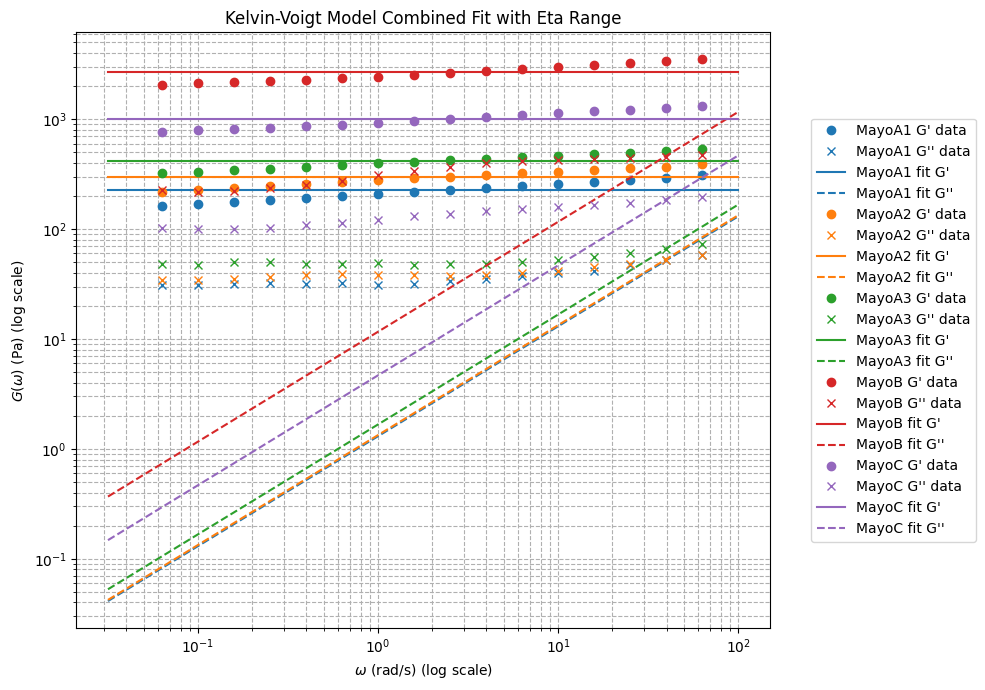

In [8]:
def kv_model_gprime(eta, lam):
    return eta / lam

def kv_model_gdoubleprime(omega, eta):
    return omega * eta

def kv_residual(params, omega, Gp_exp, Gpp_exp):
    # Returns the combined residual vector for G' and G''. residual[:N] = (G'(model) - G'(exp)); residual[N:] = (G''(model) - G''(exp))
    eta, lam = params
    Gp_model_scalar = kv_model_gprime(eta, lam)   # single value
    Gpp_model_array = kv_model_gdoubleprime(omega, eta)  # array of length N
    Gp_model_array = np.full_like(Gp_exp, Gp_model_scalar)
    res_gprime  = Gp_model_array - Gp_exp      # Residual for G'
    res_gdouble = Gpp_model_array - Gpp_exp     # Residual for G''
    return np.concatenate([res_gprime, res_gdouble])

def estimate_eta_range(omega, G_double_prime_exp):
    eta_candidates = G_double_prime_exp / omega
    eta_min = np.min(eta_candidates)
    eta_max = np.max(eta_candidates)
    return eta_min, eta_max

def fit_kv_combined(omega, Gp_exp, Gpp_exp, lam_bounds=(1e-8, 1e8)):
    # 1) Estimate eta range
    eta_min, eta_max = estimate_eta_range(omega, Gpp_exp)

    # 2) Build overall bounds for (eta, lambda)
    bounds = ([eta_min, lam_bounds[0]], [eta_max, lam_bounds[1]])

    # 3) Initial guess as geometric mean
    eta_init = np.sqrt(eta_min * eta_max)
    lam_init = np.sqrt(lam_bounds[0] * lam_bounds[1])
    initial_guess = [eta_init, lam_init]

    # 4) Perform least_squares
    result = least_squares(
        fun=kv_residual,
        x0=initial_guess,
        args=(omega, Gp_exp, Gpp_exp),
        bounds=bounds,
        # method='trf'
        # verbose=2
    )

    eta_opt, lam_opt = result.x
    return eta_opt, lam_opt, (eta_min, eta_max)

def compute_mse_complex(omega, Gp_exp, Gpp_exp, eta_opt, lam_opt):
    G_exp_complex = Gp_exp + 1j * Gpp_exp

    # Kelvin-Voigt model
    Gp_model = kv_model_gprime(eta_opt, lam_opt)         # single value
    Gpp_model = kv_model_gdoubleprime(omega, eta_opt)    # array
    G_model_complex = Gp_model + 1j*Gpp_model

    diff = G_model_complex - G_exp_complex
    mse_total = np.mean(np.abs(diff)**2)    # MSE = mean(|G_model - G_exp|^2)
    mse_real  = np.mean((G_model_complex.real - Gp_exp)**2)
    mse_imag  = np.mean((G_model_complex.imag - Gpp_exp)**2)

    return mse_total, mse_real, mse_imag

def analyze_dataset_kv_combined(dataset_name):
    if dataset_name not in EXPERIMENTAL_DATA:
        print(f"Dataset {dataset_name} not found.")
        return None

    data = EXPERIMENTAL_DATA[dataset_name]
    omega    = data['omega']
    Gp_exp   = data['G_prime_exp']
    Gpp_exp  = data['G_double_prime_exp']

    eta_opt, lam_opt, (eta_min, eta_max) = fit_kv_combined(
        omega, Gp_exp, Gpp_exp,
        lam_bounds=(1e-8, 1e8),
    )

    mse_total, mse_real, mse_imag = compute_mse_complex(omega, Gp_exp, Gpp_exp, eta_opt, lam_opt)

    print(f"\n Kelvin-Voigt Model for {dataset_name}:")
    print(f"  Estimated eta range: [{eta_min:.4g}, {eta_max:.4g}]")
    print(f"  Fitted eta:    {eta_opt:.6g}")
    print(f"  Fitted lambda: {lam_opt:.6g}")
    print(f"  MSE total: {mse_total:.4e}  (Real: {mse_real:.4e}, Imag: {mse_imag:.4e})")
    print("----------------------------------------------------------------")

    return {
        'eta': eta_opt,
        'lambda': lam_opt,
        'eta_min': eta_min,
        'eta_max': eta_max,
        'mse_total': mse_total,
        'mse_real': mse_real,
        'mse_imag': mse_imag
    }

def plot_all_data_kv_fits_combined(dataset_names):
    plt.figure(figsize=(10, 7))
    omega_line = np.logspace(-1.5, 2, 500)
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for idx, name in enumerate(dataset_names):
        if name not in EXPERIMENTAL_DATA:
            continue
        fit_result = analyze_dataset_kv_combined(name)
        if fit_result is None:
            continue
        eta_opt = fit_result['eta']
        lam_opt = fit_result['lambda']

        # Experimental data
        data = EXPERIMENTAL_DATA[name]
        omega_exp = data['omega']
        Gp_exp    = data['G_prime_exp']
        Gpp_exp   = data['G_double_prime_exp']

        # Model predictions for plotting
        Gp_model_val = eta_opt / lam_opt  # constant in simple K-V
        Gp_model_line = np.full_like(omega_line, Gp_model_val)
        Gpp_model_line = omega_line * eta_opt

        c = color_cycle[idx % len(color_cycle)]

        # Plot experimental data
        plt.loglog(omega_exp, Gp_exp, 'o', color=c, label=f"{name} G' data")
        plt.loglog(omega_exp, Gpp_exp, 'x', color=c, label=f"{name} G'' data")

        # Plot fitted lines
        plt.loglog(omega_line, Gp_model_line, color=c, linestyle='-', label=f"{name} fit G'")
        plt.loglog(omega_line, Gpp_model_line, color=c, linestyle='--', label=f"{name} fit G''")

    plt.xlabel(r'$\omega$ (rad/s) (log scale)')
    plt.ylabel(r'$G(\omega)$ (Pa) (log scale)')
    plt.title("Kelvin-Voigt Model Combined Fit with Eta Range")
    plt.grid(True, which='both', ls='--')
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
    plt.tight_layout()
    # plt.legend()
    plt.show()

def main():
    dataset_names = ['MayoA1', 'MayoA2', 'MayoA3', 'MayoB', 'MayoC']
    plot_all_data_kv_fits_combined(dataset_names)

if __name__ == "__main__":
    main()

# The combined Kelvin-Voigt and Maxwell Model

## Curve Fit for n<=6(because when n >=7, it will overfitting)

===== Fitting Results (G' & G'') =====
Data set: MayoA1
  Best n = 5
  a0 = 0.0000, b0 = 0.3296  (b0/a0 =lambda_0 = 587830622855.4456)
    a_1 = 36.4878,  lambda_1 = 0.1327
    a_2 = 36.3402,  lambda_2 = 4.5761
    a_3 = 162.6563,  lambda_3 = 121.3986
    a_4 = 65.6040,  lambda_4 = 0.0197
    a_5 = 34.3924,  lambda_5 = 0.6832
  SSE = 39.2076, MSE = 1.2252

Data set: MayoA2
  Best n = 6
  a0 = 147.0840, b0 = 0.0542  (b0/a0 =lambda_0 = 0.0004)
    a_1 = 33.1513,  lambda_1 = 6.5633
    a_2 = 95.4392,  lambda_2 = 0.0118
    a_3 = 68.7672,  lambda_3 = 56.6082
    a_4 = 38.5243,  lambda_4 = 1.6116
    a_5 = 32.3603,  lambda_5 = 0.3322
    a_6 = 37.9540,  lambda_6 = 0.0762
  SSE = 9.1857, MSE = 0.2871

Data set: MayoA3
  Best n = 6
  a0 = 0.0000, b0 = 0.4214  (b0/a0 =lambda_0 = 188025104444.5680)
    a_1 = 156.4463,  lambda_1 = 157.0192
    a_2 = 55.8954,  lambda_2 = 4.5254
    a_3 = 165.9648,  lambda_3 = 157.0407
    a_4 = 51.1196,  lambda_4 = 0.8196
    a_5 = 51.3292,  lambda_5 = 0.1323
   

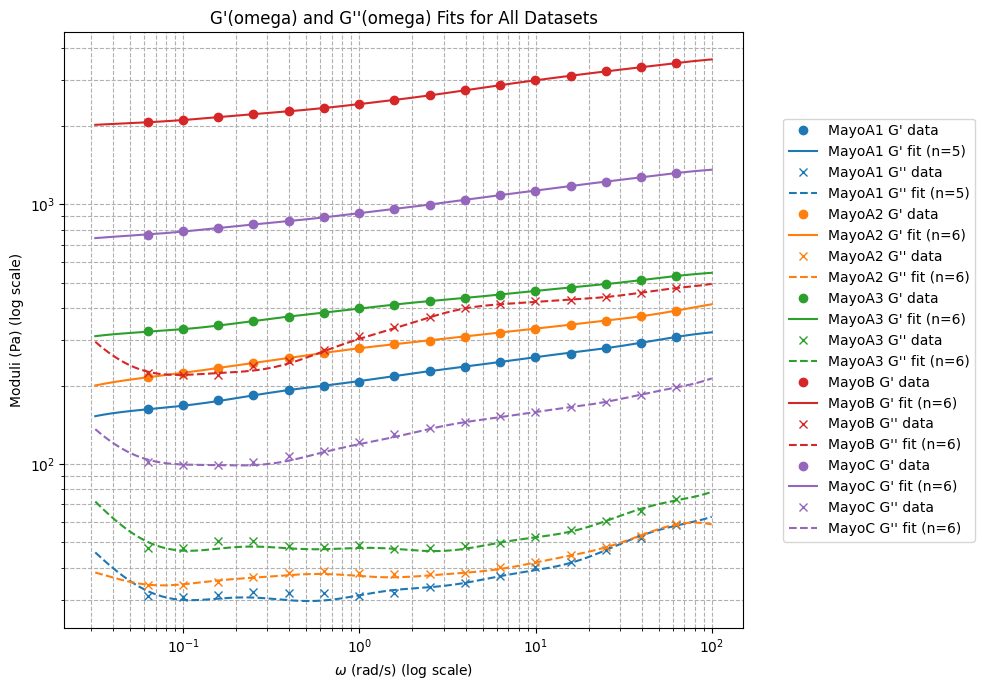

In [12]:
def gboth_model(omega_concat, *params):
    n_points = len(omega_concat) // 2   # Recover the number of frequencies for G' and for G''
    omega_gprime = omega_concat[:n_points] 
    omega_gdoubleprime = omega_concat[n_points:]
    n = global_n  # Use a global variable to store the number of (a_i, lambda_i) pairs
    a0 = params[0]
    b0 = params[1]
    a_list = params[2:2+n]
    lambda_list = params[2+n:2+2*n]
    
    #  G'(omega) = a0 + sum_i [ a_i * (w^2 * lambda_i^2) / (1 + w^2 * lambda_i^2 ) ]
    Gprime_values = np.zeros_like(omega_gprime)
    Gprime_values += a0
    for ai, li in zip(a_list, lambda_list):
        Gprime_values += ai * (omega_gprime**2 * li**2) / (1.0 + omega_gprime**2 * li**2)
    
    #  G''(omega) = b0 * w + sum_i [ a_i * (w * lambda_i) / (1 + w^2 * lambda_i^2) ]
    Gdoubleprime_values = np.zeros_like(omega_gdoubleprime)
    Gdoubleprime_values += b0 * omega_gdoubleprime
    for ai, li in zip(a_list, lambda_list):
        Gdoubleprime_values += ai * (omega_gdoubleprime * li) / (1.0 + omega_gdoubleprime**2 * li**2)
    
    return np.concatenate([Gprime_values, Gdoubleprime_values])

#######################initial guess for the parameters#######################
def fit_gboth_with_fixed_n(omega_data, Gprime_data, Gdoubleprime_data, n, p0_a0=10.0, p0_b0=1.0, p0_ai=10.0, p0_lam=1.0):
    global global_n
    global_n = n
    
    ydata = np.concatenate([Gprime_data, Gdoubleprime_data])
    omega_full = np.concatenate([omega_data, omega_data])
    
    # Build initial guess
    p0 = [p0_a0, p0_b0] + [p0_ai]*n + [p0_lam]*n
    
    # Build bounds (assuming all parameters >= 0)
    lower_bounds = [0.0, 0.0] + [0.0]*n + [0.0]*n
    upper_bounds = [np.inf, np.inf] + [np.inf]*n + [np.inf]*n
    
    popt, pcov = curve_fit(
        gboth_model,
        omega_full,
        ydata,
        p0=p0,
        bounds=(lower_bounds, upper_bounds),
        maxfev=10000,
        # full_output=True
    )
    
    # Compute SSE and MSE
    fitted_values = gboth_model(omega_full, *popt)
    residuals = ydata - fitted_values
    SSE = np.sum(residuals**2)
    MSE = SSE / (2 * len(omega_data))  # because total points = 2*N
    
    return popt, SSE, MSE


def find_best_n(omega_data, Gprime_data, Gdoubleprime_data, n_candidates):

    best_n = None
    best_params = None
    best_SSE = np.inf
    best_MSE = None
    
    for n in n_candidates:
        popt, SSE, MSE = fit_gboth_with_fixed_n(omega_data, Gprime_data, Gdoubleprime_data, n)
        if SSE < best_SSE:
            best_SSE = SSE
            best_MSE = MSE
            best_n = n
            best_params = popt
    
    return {
        'best_n': best_n,
        'best_params': best_params,
        'best_SSE': best_SSE,
        'best_MSE': best_MSE
    }


fitting_results = {}
n_candidates = [1, 2, 3, 4, 5, 6]

for sample_name, data_dict in EXPERIMENTAL_DATA.items():
    omega_data = data_dict['omega']
    Gprime_data = data_dict['G_prime_exp']
    Gdoubleprime_data = data_dict['G_double_prime_exp']
    
    # Fit for the best n
    result_dict = find_best_n(omega_data, Gprime_data, Gdoubleprime_data, n_candidates=n_candidates)
    fitting_results[sample_name] = result_dict

# Print the fitting results
print("===== Fitting Results (G' & G'') =====")
for sample_name, result in fitting_results.items():
    best_n = result['best_n']
    best_params = result['best_params']
    SSE = result['best_SSE']
    MSE = result['best_MSE']
    
    # best_params = [a0, b0, a1, ..., a_n, lambda1, ..., lambda_n]
    a0 = best_params[0]
    b0 = best_params[1]
    a_list = best_params[2:2+best_n]
    lam_list = best_params[2+best_n:2+2*best_n]
    
    # Compute the ratio b0/a0 if a0 != 0
    if a0 != 0:
        b0_over_a0 = b0 / a0
    else:
        b0_over_a0 = np.inf
    
    print(f"Data set: {sample_name}")
    print(f"  Best n = {best_n}")
    print(f"  a0 = {a0:.4f}, b0 = {b0:.4f}  (b0/a0 =lambda_0 = {b0_over_a0:.4f})")
    for i, (ai, li) in enumerate(zip(a_list, lam_list), start=1):
        print(f"    a_{i} = {ai:.4f},  lambda_{i} = {li:.4f}")
    print(f"  SSE = {SSE:.4f}, MSE = {MSE:.4f}")
    print("============================================\n")


def plot_all_data_combined(dataset_names):
    plt.figure(figsize=(10, 7)) 
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    for idx, name in enumerate(dataset_names):
        if name not in EXPERIMENTAL_DATA:
            print(f"Dataset '{name}' not found in EXPERIMENTAL_DATA, skipping...")
            continue
        
        data = EXPERIMENTAL_DATA[name]
        omega_exp = data['omega']
        Gprime_exp = data['G_prime_exp']
        Gdoubleprime_exp = data['G_double_prime_exp']
        result_dict = fitting_results.get(name, None)
        best_n = result_dict['best_n']
        best_params = result_dict['best_params']

        omega_line = np.logspace(-1.5, 2, 500) 
        # omega_line = np.logspace(np.log10(min(omega_exp)*0.8), np.log10(max(omega_exp)*1.2),300)
        
        global global_n
        global_n = best_n
        
        Gprime_line = []
        Gdoubleprime_line = []
        for w in omega_line:
            arr_2 = np.array([w, w], dtype=float)
            val_2 = gboth_model(arr_2, *best_params)
            # val_2[0] is G'(w), val_2[1] is G''(w)
            Gprime_line.append(val_2[0])
            Gdoubleprime_line.append(val_2[1])
        
        Gprime_line = np.array(Gprime_line)
        Gdoubleprime_line = np.array(Gdoubleprime_line)
        
        c = color_cycle[idx % len(color_cycle)]
        plt.loglog(omega_exp, Gprime_exp, 'o', color=c, label=f"{name} G' data")
        plt.loglog(omega_line, Gprime_line, '-', color=c, label=f"{name} G' fit (n={best_n})")
        
        plt.loglog(omega_exp, Gdoubleprime_exp, 'x', color=c, mfc='none', label=f"{name} G'' data")
        plt.loglog(omega_line, Gdoubleprime_line, '--', color=c, label=f"{name} G'' fit (n={best_n})")
    
    plt.xlabel(r'$\omega$ (rad/s) (log scale)')
    plt.ylabel(r"Moduli (Pa) (log scale)")
    plt.title("G'(omega) and G''(omega) Fits for All Datasets")
    plt.grid(True, which='both', ls='--')
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
    plt.tight_layout()
    plt.show()


def main():
    dataset_names = ['MayoA1', 'MayoA2', 'MayoA3', 'MayoB', 'MayoC']  # Example
    plot_all_data_combined(dataset_names)

if __name__ == "__main__":
    main()
